In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import sqlite3

In [2]:
engine=create_engine('sqlite:///inventory.db')

In [3]:
def ingest_db(df,table_name,engine):
  df.to_sql(table_name,con=engine,index=False,if_exists='replace')

In [4]:
chunksize = 100000
#data ingestion in chunks
for chunk in pd.read_csv('/content/VendorDataAnalysis/sales.csv', chunksize=chunksize):
    chunk.to_sql('sales', engine, if_exists='append', index=False)

print("Data ingestion completed successfully!")


Data ingestion completed successfully!


In [5]:
for file in os.listdir('/content/VendorDataAnalysis'):
    if '.csv' in file and file!='sales.csv':
      df=pd.read_csv('/content/VendorDataAnalysis/'+file)
      print(df.shape)
      ingest_db(df,file[:-4] ,engine)

(12261, 9)
(2372474, 16)
(5543, 10)


In [6]:
conn=sqlite3.connect('inventory.db')

In [7]:
tables=pd.read_sql_query('SELECT name FROM sqlite_master WHERE type="table"',conn)
tables

,name
0,sales
1,purchase_price
2,purchases
3,vendor_invoice


In [8]:
for table in tables['name']:
  print('-'*60+table+'-'*60)
  display(pd.read_sql(f"SELECT * FROM {table} LIMIT 5",conn))

------------------------------------------------------------sales------------------------------------------------------------


,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-01,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,2024-01-02,750.0,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-03,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,2024-01-08,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,2024-01-09,375.0,1,0.79,12546,JIM BEAM BRANDS COMPANY


------------------------------------------------------------purchase_price------------------------------------------------------------


,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


------------------------------------------------------------purchases------------------------------------------------------------


,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2023-12-21,2024-01-02,2024-01-04,2024-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-02,2024-01-07,2024-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2023-12-24,2024-01-02,2024-01-09,2024-02-16,21.32,5,106.60,1


------------------------------------------------------------vendor_invoice------------------------------------------------------------


,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2024-01-04,8124,2023-12-21,2024-02-16,6,214.26,3.47,None
1,4466,AMERICAN VINTAGE BEVERAGE,2024-01-07,8137,2023-12-22,2024-02-21,15,140.55,8.57,None
2,388,ATLANTIC IMPORTING COMPANY,2024-01-09,8169,2023-12-24,2024-02-16,5,106.60,4.61,None
3,480,BACARDI USA INC,2024-01-12,8106,2023-12-20,2024-02-05,10100,137483.78,2935.20,None
4,516,BANFI PRODUCTS CORP,2024-01-07,8170,2023-12-24,2024-02-12,1935,15527.25,429.20,None


In [9]:
freight_summary=pd.read_sql('SELECT VendorNumber,SUM(Freight) AS FreightCost FROM vendor_invoice GROUP BY VendorNumber',conn)


In [10]:
freight_summary

,VendorNumber,FreightCost
0,2,27.08
1,54,0.48
2,60,367.52
3,105,62.39
4,200,6.19
...,...,...
121,98450,856.02
122,99166,130.09
123,172662,178.34
124,173357,202.50


In [11]:
pd.read_sql("""SELECT p.VendorNumber,
    p.VendorName,
    p.Brand,
    p.PurchasePrice,
    pp.Volume,
    pp.price AS ActualPrice,
    SUM(p.Quantity) AS TotalQuantityPurchased,
    SUM(p.Dollars) AS TotalDollarsPurchased
    FROM purchases p
    JOIN purchase_price pp
    ON p.Brand=pp.Brand
    WHERE p.PurchasePrice>0
    GROUP BY p.VendorNumber,p.VendorName,p.Brand
    ORDER BY TotalDollarsPurchased""",conn)

,VendorNumber,VendorName,Brand,PurchasePrice,Volume,ActualPrice,TotalQuantityPurchased,TotalDollarsPurchased
0,7245,PROXIMO SPIRITS INC.,3065,0.71,50,0.99,1,0.71
1,3960,DIAGEO NORTH AMERICA INC,6127,1.47,200,1.99,1,1.47
2,3924,HEAVEN HILL DISTILLERIES,9123,0.74,50,0.99,2,1.48
3,8004,SAZERAC CO INC,5683,0.39,50,0.49,6,2.34
4,9815,WINE GROUP INC,8527,1.32,750,4.99,2,2.64
...,...,...,...,...,...,...,...,...
10687,3960,DIAGEO NORTH AMERICA INC,3545,21.89,1750,29.99,138109,3023206.01
10688,3960,DIAGEO NORTH AMERICA INC,4261,16.17,1750,22.99,201682,3261197.94
10689,17035,PERNOD RICARD USA,8068,18.24,1750,24.99,187407,3418303.68
10690,4425,MARTIGNETTI COMPANIES,3405,23.19,1750,28.99,164038,3804041.22


In [12]:
pd.read_sql_query("""SELECT VendorNo,
    Brand,
    SUM(SalesDollars) AS TotalSalesDollars,
    SUM(SalesPrice) AS TotalSalesPrice,
    SUM(ExciseTax) AS TotalExciseTax
    FROM Sales
    GROUP BY VendorNo,Brand
    ORDER BY TotalSalesDollars""",conn)

,VendorNo,Brand,TotalSalesDollars,TotalSalesPrice,TotalExciseTax
0,8004,5287,9.800000e-01,0.98,0.10
1,9206,2773,9.900000e-01,0.99,0.05
2,3252,3933,1.980000e+00,0.99,0.10
3,3924,9123,1.980000e+00,0.99,0.10
4,10050,3623,1.980000e+00,1.98,0.10
...,...,...,...,...,...
11267,3960,3545,4.223108e+06,545778.28,249587.83
11268,3960,4261,4.475973e+06,420050.01,368242.80
11269,17035,8068,4.538121e+06,461140.15,343854.07
11270,4425,3405,4.819073e+06,561512.37,294438.66


In [13]:
vendor_sales_summary=pd.read_sql_query("""WITH FreightSummary AS(
    SELECT VendorNumber,
    SUM(Freight) AS FreightCost
    FROM vendor_invoice
    GROUP BY VendorNumber
),
PurchaseSummary AS(
    SELECT p.VendorNumber,
    p.VendorName,
    p.Brand,
    p.Description,
    p.PurchasePrice,
    pp.price AS ActualPrice,
    pp.Volume,
    SUM(p.Quantity) AS TotalQuantityPurchased,
    SUM(p.Dollars) AS TotalPurchaseDollars
    FROM purchases p
    JOIN purchase_price pp
    ON p.Brand=pp.Brand
    WHERE p.PurchasePrice>0
    GROUP BY p.VendorNumber,p.VendorName,p.Brand,p.Description,p.purchaseprice,pp.price,pp.volume
),
SalesSummary AS(
    SELECT VendorNo,
    Brand,
    SUM(SalesQuantity) AS TotalQuantitySold,
    SUM(SalesDollars) AS TotalSalesDollars,
    SUM(SalesPrice) AS TotalSalesPrice,
    SUM(ExciseTax) AS TotalExciseTax
    FROM Sales
    GROUP BY VendorNo,Brand
)
SELECT ps.VendorNumber,
    ps.VendorName,
    ps.Brand,
    ps.Description,
    ps.PurchasePrice,
    ps.ActualPrice,
    ps.Volume,
    ps.TotalQuantityPurchased,
    ps.TotalPurchaseDollars,
    ss.TotalQuantitySold,
    ss.TotalSalesDollars,
    ss.TotalSalesPrice,
    ss.TotalExciseTax,
    fs.FreightCost
    FROM PurchaseSummary ps
    LEFT JOIN SalesSummary ss
    ON ps.VendorNumber=ss.VendorNo
    AND ps.Brand=ss.Brand
    LEFT JOIN FreightSummary fs
    ON ps.VendorNumber=fs.VendorNumber
    ORDER BY ps.TotalPurchaseDollars DESC""",conn
)

In [14]:
vendor_sales_summary

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalQuantityPurchased,TotalPurchaseDollars,TotalQuantitySold,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750,145080,3811251.60,142049.0,5.101920e+06,672819.31,260999.20,68601.68
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750,164038,3804041.22,160247.0,4.819073e+06,561512.37,294438.66,144929.24
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750,187407,3418303.68,187140.0,4.538121e+06,461140.15,343854.07,123780.22
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750,201682,3261197.94,200412.0,4.475973e+06,420050.01,368242.80,257032.07
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750,138109,3023206.01,135838.0,4.223108e+06,545778.28,249587.83,257032.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750,2,2.64,5.0,1.595000e+01,10.96,0.55,27100.41
10688,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50,6,2.34,134.0,6.566000e+01,1.47,7.04,50293.62
10689,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50,2,1.48,2.0,1.980000e+00,0.99,0.10,14069.87
10690,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200,1,1.47,72.0,1.432800e+02,77.61,15.12,257032.07


In [15]:
vendor_sales_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VendorNumber            10692 non-null  int64  
 1   VendorName              10692 non-null  object 
 2   Brand                   10692 non-null  int64  
 3   Description             10692 non-null  object 
 4   PurchasePrice           10692 non-null  float64
 5   ActualPrice             10692 non-null  float64
 6   Volume                  10692 non-null  object 
 7   TotalQuantityPurchased  10692 non-null  int64  
 8   TotalPurchaseDollars    10692 non-null  float64
 9   TotalQuantitySold       10514 non-null  float64
 10  TotalSalesDollars       10514 non-null  float64
 11  TotalSalesPrice         10514 non-null  float64
 12  TotalExciseTax          10514 non-null  float64
 13  FreightCost             10692 non-null  float64
dtypes: float64(8), int64(3), object(3)
mem

In [16]:
vendor_sales_summary.isnull().sum()

,0
VendorNumber,0
VendorName,0
Brand,0
Description,0
PurchasePrice,0
ActualPrice,0
Volume,0
TotalQuantityPurchased,0
TotalPurchaseDollars,0
TotalQuantitySold,178


In [17]:
vendor_sales_summary['Volume']=(vendor_sales_summary['Volume']).astype(float)

In [18]:
vendor_sales_summary.fillna(0,inplace=True)

In [19]:
vendor_sales_summary['VendorName'].unique()

array(['BROWN-FORMAN CORP          ', 'MARTIGNETTI COMPANIES',
       'PERNOD RICARD USA          ', 'DIAGEO NORTH AMERICA INC   ',
       'BACARDI USA INC            ', 'JIM BEAM BRANDS COMPANY    ',
       'MAJESTIC FINE WINES        ', 'ULTRA BEVERAGE COMPANY LLP ',
       'STOLI GROUP,(USA) LLC      ', 'PROXIMO SPIRITS INC.       ',
       'MOET HENNESSY USA INC      ', 'CAMPARI AMERICA            ',
       'SAZERAC CO INC             ', 'CONSTELLATION BRANDS INC   ',
       'M S WALKER INC             ', 'SAZERAC NORTH AMERICA INC. ',
       'PALM BAY INTERNATIONAL INC ', 'REMY COINTREAU USA INC     ',
       'SIDNEY FRANK IMPORTING CO  ', 'E & J GALLO WINERY         ',
       'WILLIAM GRANT & SONS INC   ', 'HEAVEN HILL DISTILLERIES   ',
       'DISARONNO INTERNATIONAL LLC', 'EDRINGTON AMERICAS         ',
       'CASTLE BRANDS CORP.        ', 'SOUTHERN WINE & SPIRITS NE ',
       'STE MICHELLE WINE ESTATES  ', 'TRINCHERO FAMILY ESTATES   ',
       'MHW LTD                    ', 'W

In [20]:
vendor_sales_summary['VendorName']=vendor_sales_summary['VendorName'].str.strip()

In [65]:
vendor_sales_summary['VendorName'].unique()

array(['BROWN-FORMAN CORP', 'MARTIGNETTI COMPANIES', 'PERNOD RICARD USA',
       'DIAGEO NORTH AMERICA INC', 'BACARDI USA INC',
       'JIM BEAM BRANDS COMPANY', 'MAJESTIC FINE WINES',
       'ULTRA BEVERAGE COMPANY LLP', 'STOLI GROUP,(USA) LLC',
       'PROXIMO SPIRITS INC.', 'MOET HENNESSY USA INC', 'CAMPARI AMERICA',
       'SAZERAC CO INC', 'CONSTELLATION BRANDS INC', 'M S WALKER INC',
       'SAZERAC NORTH AMERICA INC.', 'PALM BAY INTERNATIONAL INC',
       'REMY COINTREAU USA INC', 'SIDNEY FRANK IMPORTING CO',
       'E & J GALLO WINERY', 'WILLIAM GRANT & SONS INC',
       'HEAVEN HILL DISTILLERIES', 'DISARONNO INTERNATIONAL LLC',
       'EDRINGTON AMERICAS', 'CASTLE BRANDS CORP.',
       'SOUTHERN WINE & SPIRITS NE', 'STE MICHELLE WINE ESTATES',
       'TRINCHERO FAMILY ESTATES', 'MHW LTD', 'WINE GROUP INC',
       'PERFECTA WINES', 'LUXCO INC', 'TREASURY WINE ESTATES',
       'DIAGEO CHATEAU ESTATE WINES', 'SHAW ROSS INT L IMP LTD',
       'PINE STATE TRADING CO', 'PHILLIPS PRO

In [21]:
vendor_sales_summary['Description'].unique()

array(['Jack Daniels No 7 Black', "Tito's Handmade Vodka",
       'Absolut 80 Proof', ..., 'Crown Royal Apple',
       'Concannon Glen Ellen Wh Zin', 'The Club Strawbry Margarita'],
      dtype=object)

In [22]:
vendor_sales_summary['GrossProfit']=vendor_sales_summary['TotalSalesDollars']-vendor_sales_summary['TotalPurchaseDollars']

In [23]:
vendor_sales_summary['ProfitMargin%']=(vendor_sales_summary['GrossProfit']/vendor_sales_summary['TotalSalesDollars'])*100

In [24]:
vendor_sales_summary['StockTurnover']=vendor_sales_summary['TotalQuantitySold']/vendor_sales_summary['TotalQuantityPurchased']

In [25]:
vendor_sales_summary['SalestoPurchaseRatio']=vendor_sales_summary['TotalSalesDollars']/vendor_sales_summary['TotalPurchaseDollars']

In [26]:
vendor_sales_summary.to_csv('/content/VendorDataAnalysis/vendor_sales_summary.csv', index=False)

In [27]:
vendor_sales_summary.to_sql('vendor_sales_summary',conn,index=False,if_exists='replace')

10692

In [28]:
df=pd.read_sql_query("""SELECT * FROM vendor_sales_summary""",conn)

In [29]:
df.describe()

,VendorNumber,Brand,PurchasePrice,ActualPrice,Volume,TotalQuantityPurchased,TotalPurchaseDollars,TotalQuantitySold,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin%,StockTurnover,SalestoPurchaseRatio
count,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04,1.069200e+04,10692.000000,10692.000000
mean,10650.649458,18039.228769,24.385303,35.643671,847.360550,3140.886831,3.010669e+04,3077.482136,4.223907e+04,18793.783627,1774.226259,61433.763214,1.213238e+04,-inf,1.706793,2.504390
std,18753.519148,12662.187074,109.269375,148.246016,664.309212,11095.086769,1.230678e+05,10952.851391,1.676553e+05,44952.773386,10975.582240,60938.458032,4.622434e+04,NaN,6.020460,8.459067
min,2.000000,58.000000,0.360000,0.490000,50.000000,1.000000,7.100000e-01,0.000000,0.000000e+00,0.000000,0.000000,0.090000,-5.200278e+04,-inf,0.000000,0.000000
25%,3951.000000,5793.500000,6.840000,10.990000,750.000000,36.000000,4.534575e+02,33.000000,7.292200e+02,289.710000,4.800000,14069.870000,5.292000e+01,1.332451e+01,0.807229,1.153729
50%,7153.000000,18761.500000,10.455000,15.990000,750.000000,262.000000,3.655465e+03,261.000000,5.298045e+03,2857.800000,46.570000,50293.620000,1.399640e+03,3.040546e+01,0.981529,1.436894
75%,9552.000000,25514.250000,19.482500,28.990000,750.000000,1975.750000,2.073824e+04,1929.250000,2.839692e+04,16059.562500,418.650000,79528.990000,8.660200e+03,3.995613e+01,1.039342,1.665449
max,201359.000000,90631.000000,5681.810000,7499.990000,20000.000000,337660.000000,3.811252e+06,334939.000000,5.101920e+06,672819.310000,368242.800000,257032.070000,1.290668e+06,9.971666e+01,274.500000,352.928571


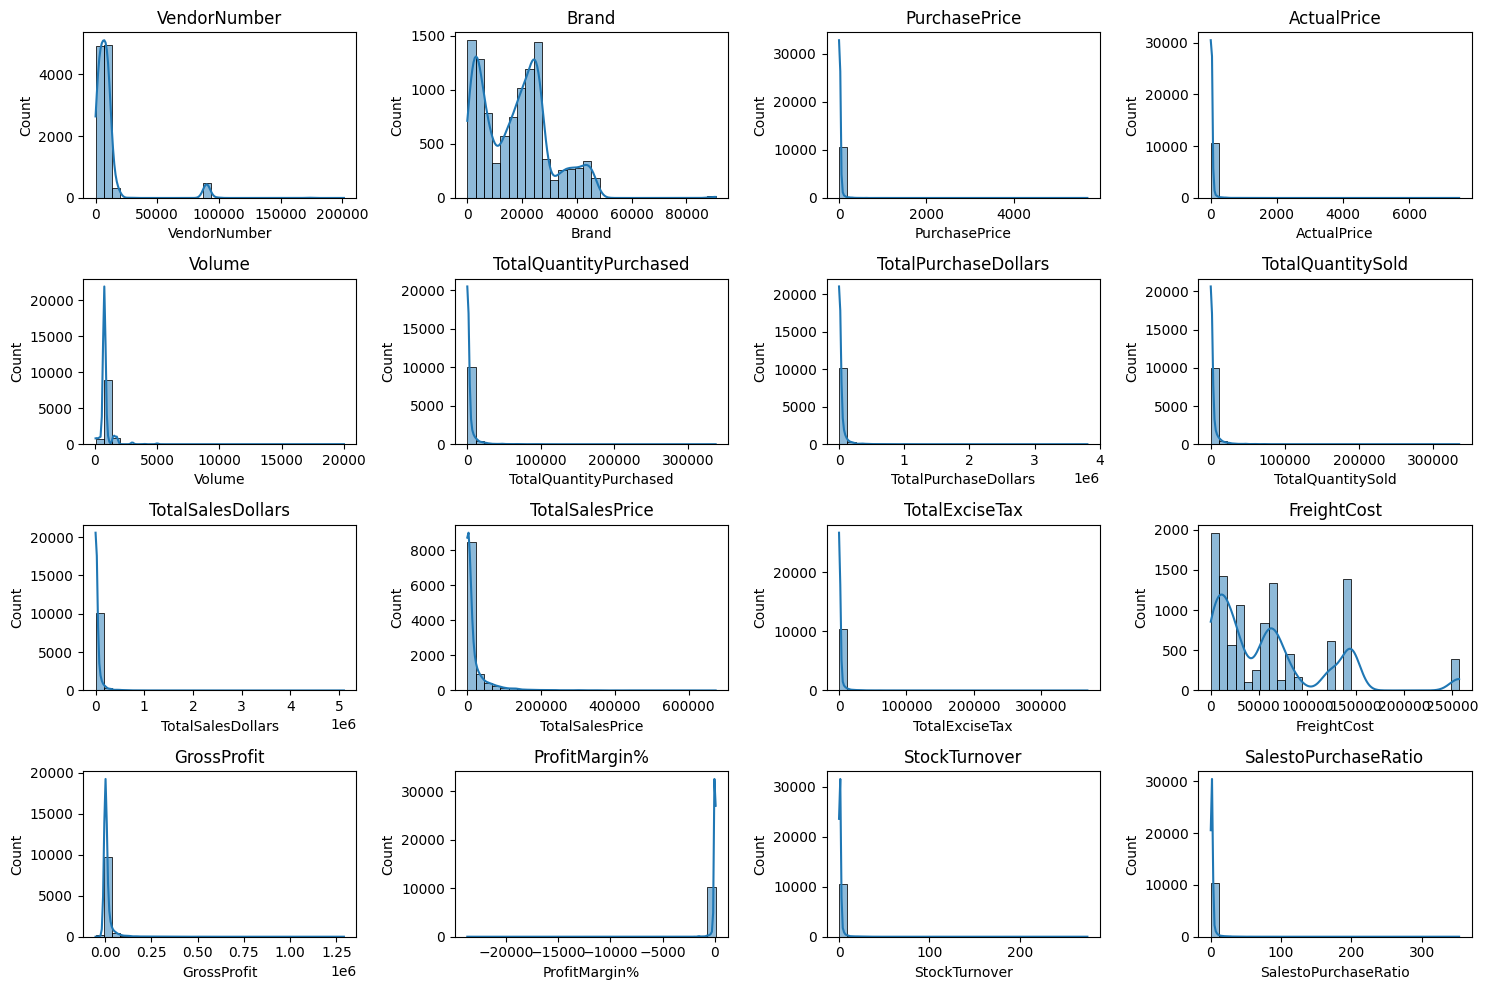

In [30]:
numerical_cols=df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
  plt.subplot(4,4,i+1)
  sns.histplot(df[col],kde=True,bins=30)
  plt.title(col)
plt.tight_layout()
plt.show()

In [31]:
df=pd.read_sql_query("""SELECT *
FROM vendor_sales_summary
WHERE GrossProfit > 0 AND
"profitMargin%" > 0 AND
TotalQuantitySold > 0""",conn)

In [32]:
cursor=conn.cursor()

In [33]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalQuantityPurchased,TotalPurchaseDollars,TotalQuantitySold,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin%,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5.101920e+06,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4.819073e+06,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4.538121e+06,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4.475973e+06,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4.223108e+06,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8560,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,1.595000e+01,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8561,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,6.566000e+01,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8562,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.980000e+00,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8563,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,1.432800e+02,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


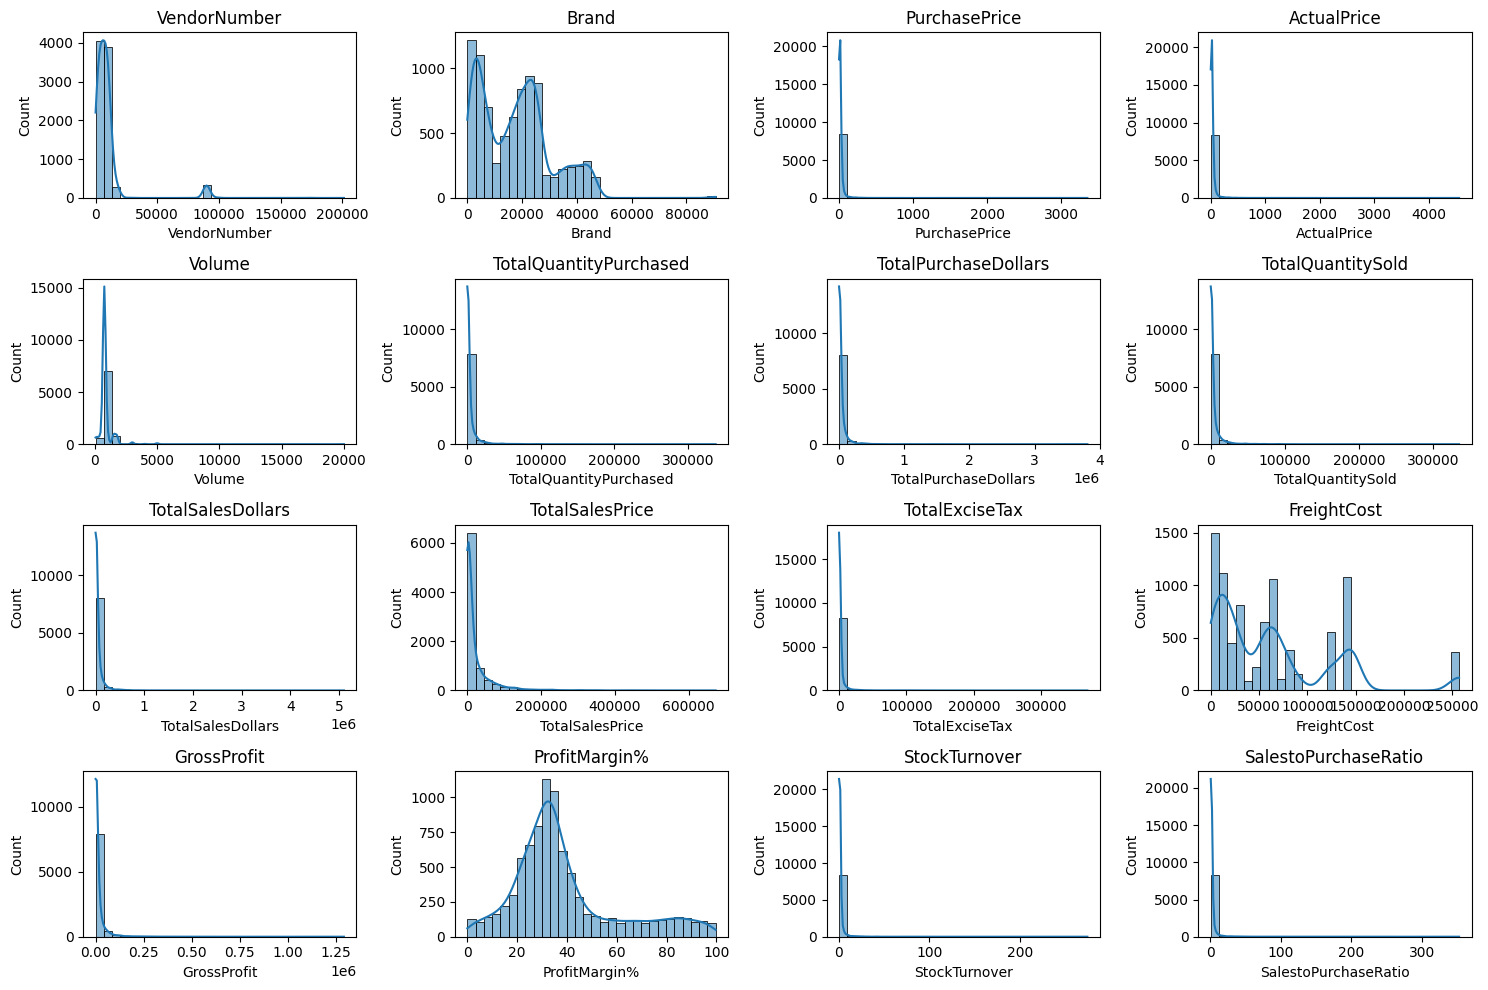

In [34]:
numerical_cols=df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
  plt.subplot(4,4,i+1)
  sns.histplot(df[col],kde=True,bins=30)
  plt.title(col)
plt.tight_layout()
plt.show()

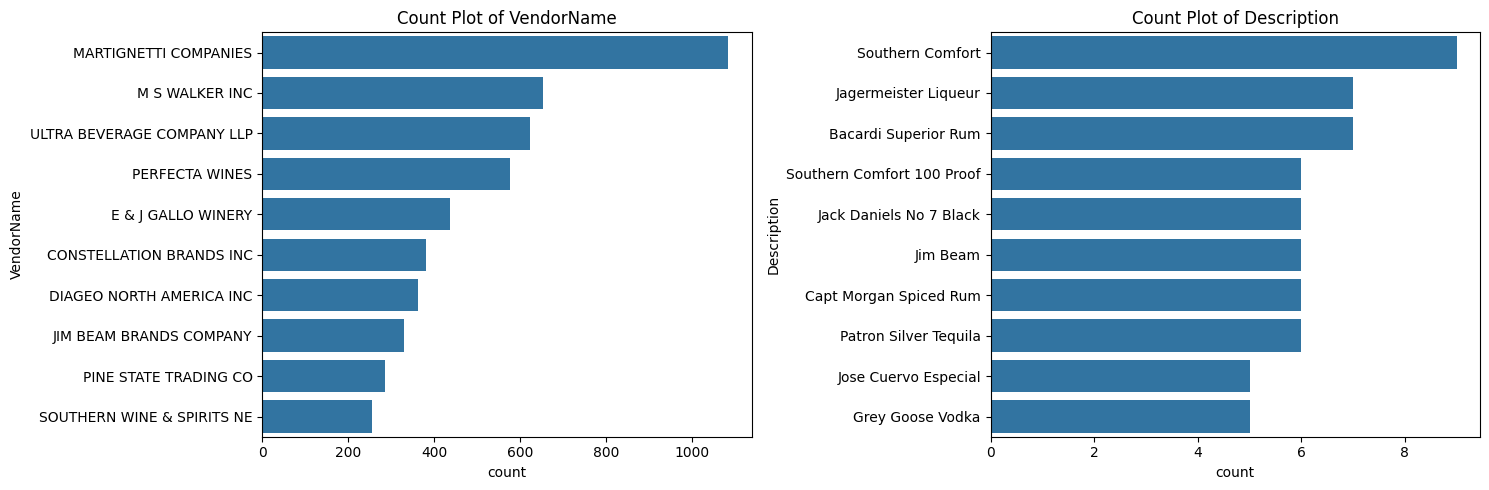

In [35]:
categorical_cols=df[["VendorName","Description"]]
plt.figure(figsize=(15,5))
for i,col in enumerate(categorical_cols):
  plt.subplot(1,2,i+1)
  sns.countplot(y=df[col], order=df[col].value_counts().index[:10])
  plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

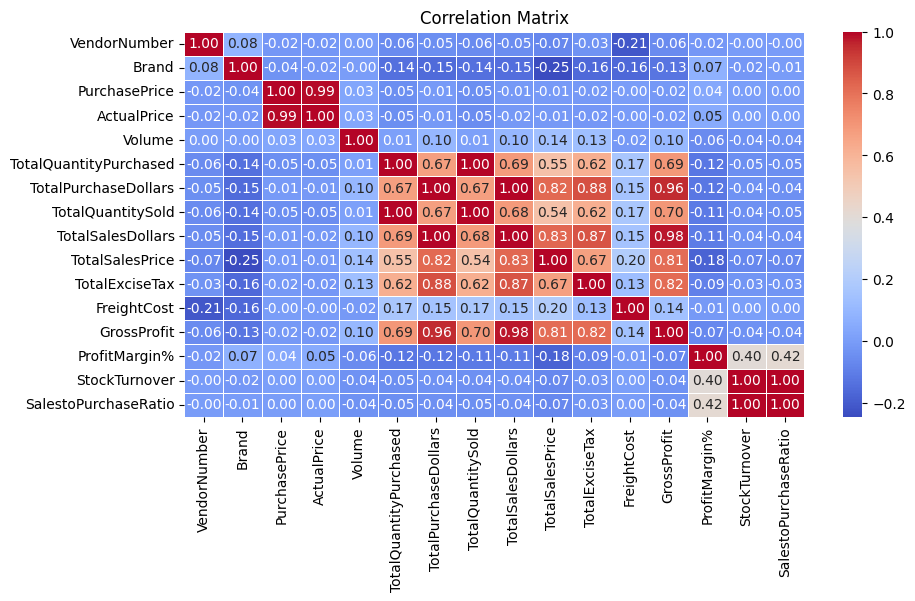

In [36]:
plt.figure(figsize=(10,5))
correlation_matrix=df[numerical_cols].corr()
sns.heatmap(correlation_matrix,annot=True,fmt='.2f',cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [37]:
brand_performance=df.groupby('Description').agg({'TotalSalesDollars':'sum', 'ProfitMargin%':'mean'}).reset_index()

In [38]:
brand_performance

,Description,TotalSalesDollars,ProfitMargin%
0,(RI) 1,21519.09,18.060661
1,.nparalleled Svgn Blanc,1094.63,29.978166
2,10 Span Cab Svgn CC,2703.89,20.937612
3,10 Span Chard CC,3325.56,27.806445
4,10 Span Pnt Gris Monterey Cy,2082.22,32.226182
...,...,...,...
7702,Zorvino Vyds Sangiovese,10579.03,29.525675
7703,Zuccardi Q Malbec,1639.18,23.981503
7704,Zum Rsl,10857.34,32.675038
7705,Zwack Liqueur,227.88,16.653502


In [67]:
brand_performance.to_csv('/content/VendorDataAnalysis/brand_performance.csv',index=False)

In [39]:
sales_threshold_low=brand_performance['TotalSalesDollars'].quantile(0.15)
high_profit_threshold=brand_performance["ProfitMargin%"].quantile(0.85)

In [40]:
sales_threshold_low,high_profit_threshold

(np.float64(560.299), np.float64(64.97017552750111))

In [41]:
#brands with low sales and high profit


low_sales_high_profit_brands=brand_performance[(brand_performance['TotalSalesDollars']<=sales_threshold_low) & (brand_performance['ProfitMargin%']>=high_profit_threshold)]
print("Brands wiht low Sales and High Profit Margins:")
display(low_sales_high_profit_brands.sort_values(by='TotalSalesDollars'))

Brands wiht low Sales and High Profit Margins:


,Description,TotalSalesDollars,ProfitMargin%
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [42]:
#vendors and brands with highest sales

top_vendors=df.groupby('VendorName')['TotalSalesDollars'].sum().round(2).nlargest(10)
top_brands=df.groupby('Description')['TotalSalesDollars'].sum().nlargest(10)
print("Top 10 Vendors with Highest Sales:")
display(top_vendors)
print("\nTop 10 Brands with Highest Sales:")
display(top_brands)

Top 10 Vendors with Highest Sales:


,TotalSalesDollars
VendorName,
DIAGEO NORTH AMERICA INC,67990099.42
MARTIGNETTI COMPANIES,39330359.36
PERNOD RICARD USA,32063196.19
JIM BEAM BRANDS COMPANY,31423020.46
BACARDI USA INC,24854817.14
CONSTELLATION BRANDS INC,24218745.65
E & J GALLO WINERY,18399899.46
BROWN-FORMAN CORP,18247230.65
ULTRA BEVERAGE COMPANY LLP,16502544.31



Top 10 Brands with Highest Sales:


,TotalSalesDollars
Description,
Jack Daniels No 7 Black,7964746.76
Tito's Handmade Vodka,7399657.58
Grey Goose Vodka,7209608.06
Capt Morgan Spiced Rum,6356320.62
Absolut 80 Proof,6244752.03
Jameson Irish Whiskey,5715759.69
Ketel One Vodka,5070083.56
Baileys Irish Cream,4150122.07
Kahlua,3604858.66


In [43]:
def format_value(value):
    if value>=1e6:
        return f'{value/1e6:.2f}M';
    elif value>=1e3:
        return f'{value/1e3:.2f}K'
    else:
        return f'{value:.2f}'

In [69]:
top_vendors.apply(format_value)

,TotalSalesDollars
VendorName,
DIAGEO NORTH AMERICA INC,67.99M
MARTIGNETTI COMPANIES,39.33M
PERNOD RICARD USA,32.06M
JIM BEAM BRANDS COMPANY,31.42M
BACARDI USA INC,24.85M
CONSTELLATION BRANDS INC,24.22M
E & J GALLO WINERY,18.40M
BROWN-FORMAN CORP,18.25M
ULTRA BEVERAGE COMPANY LLP,16.50M


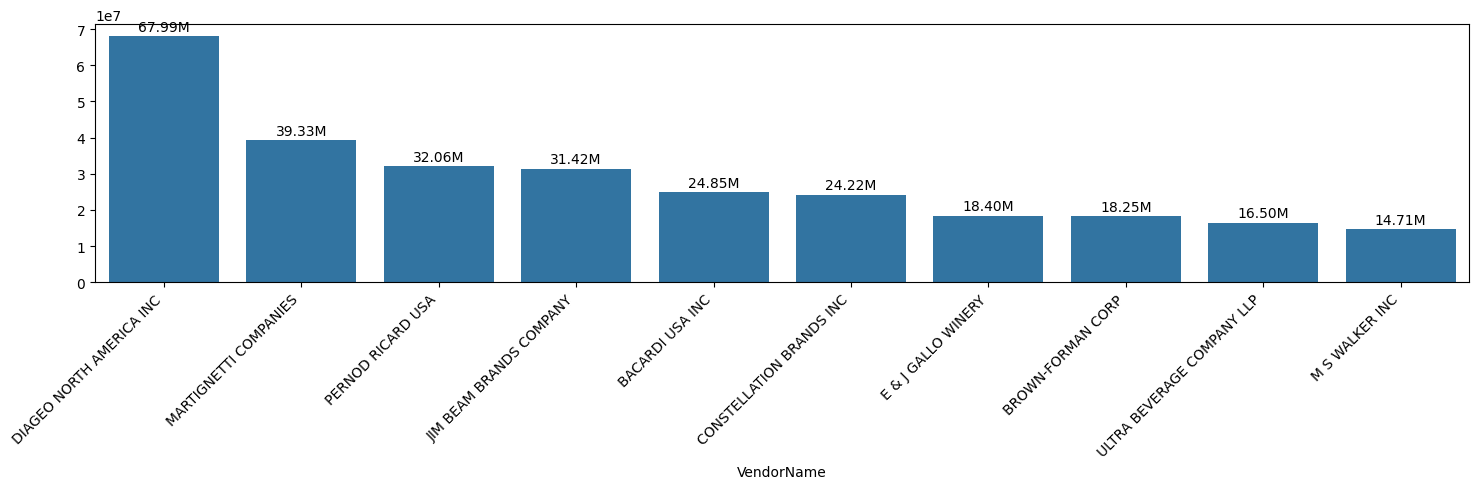

In [45]:
plt.figure(figsize=(15,5))
sns.barplot(x=top_vendors.index,y=top_vendors.values)
for i, value in enumerate(top_vendors.values):
    plt.text(i, value + (0.01 * max(top_vendors.values)),
             format_value(value),
             ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

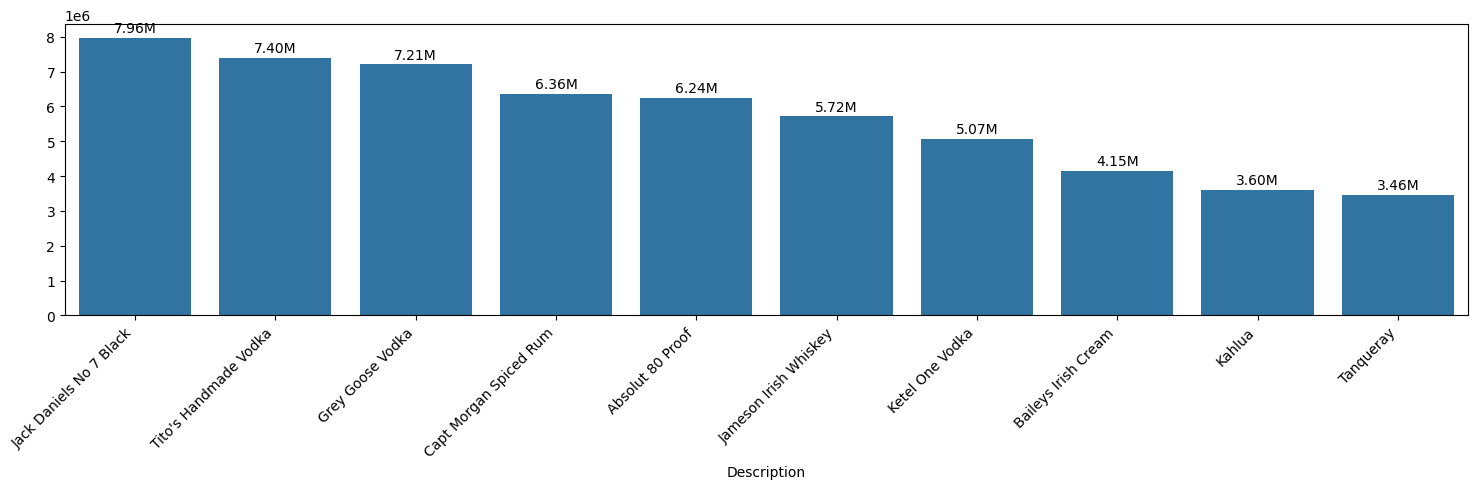

In [46]:
plt.figure(figsize=(15,5))
sns.barplot(x=top_brands.index,y=top_brands.values)
for i, value in enumerate(top_brands.values):
    plt.text(i, value + (0.01 * max(top_brands.values)),
             format_value(value),
             ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

In [47]:
#vendors having max purchase dollar

vendor_performance=df.groupby('VendorName').agg({'TotalPurchaseDollars':'sum','GrossProfit':'sum','TotalSalesDollars':'sum'}).reset_index()

In [48]:
vendor_performance['PurchaseContribution%']=vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum()*100

In [49]:
vendor_performance.sort_values(by='PurchaseContribution%',ascending=False,inplace=True)

In [72]:
vendor_performance['GrossProfit']=vendor_performance['GrossProfit'].apply(format_value)
vendor_performance['TotalPurchaseDollars']=vendor_performance['TotalPurchaseDollars'].apply(format_value)
vendor_performance['TotalSalesDollars']=vendor_performance['TotalSalesDollars'].apply(format_value)

In [73]:
vendor_performance

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.300334
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.297719
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.760548
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.644435
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.671926
...,...,...,...,...,...
33,FANTASY FINE WINES CORP,128.64,198.95,327.59,0.000042
107,UNCORKED,118.74,58.20,176.94,0.000039
85,SILVER MOUNTAIN CIDERS,77.18,265.33,342.51,0.000025
16,CAPSTONE INTERNATIONAL,54.64,192.23,246.87,0.000018


In [68]:
vendor_performance.to_csv('/content/VendorDataAnalysis/vendor_purchase_contribution.csv',index=False)

In [74]:
top_10_vendors=vendor_performance.head(10)

In [75]:
top_10_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.300334
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.297719
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.760548
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.644435
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.671926
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.969667
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.307606
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.926789
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.633478
53,M S WALKER INC,9.76M,4.94M,14.71M,3.177053


In [54]:
top_10_vendors['PurchaseContribution%'].sum()

np.float64(65.68955597053622)

In [55]:
top_10_vendors['CumulativeContribution%']=top_10_vendors['PurchaseContribution%'].cumsum()

/tmp/ipython-input-314543045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_vendors['CumulativeContribution%']=top_10_vendors['PurchaseContribution%'].cumsum()


/tmp/ipython-input-597294874.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='VendorName',y='PurchaseContribution%',data=top_10_vendors,ax=ax1,palette='mako')
/tmp/ipython-input-597294874.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_10_vendors['VendorName'],rotation=45,ha='right')


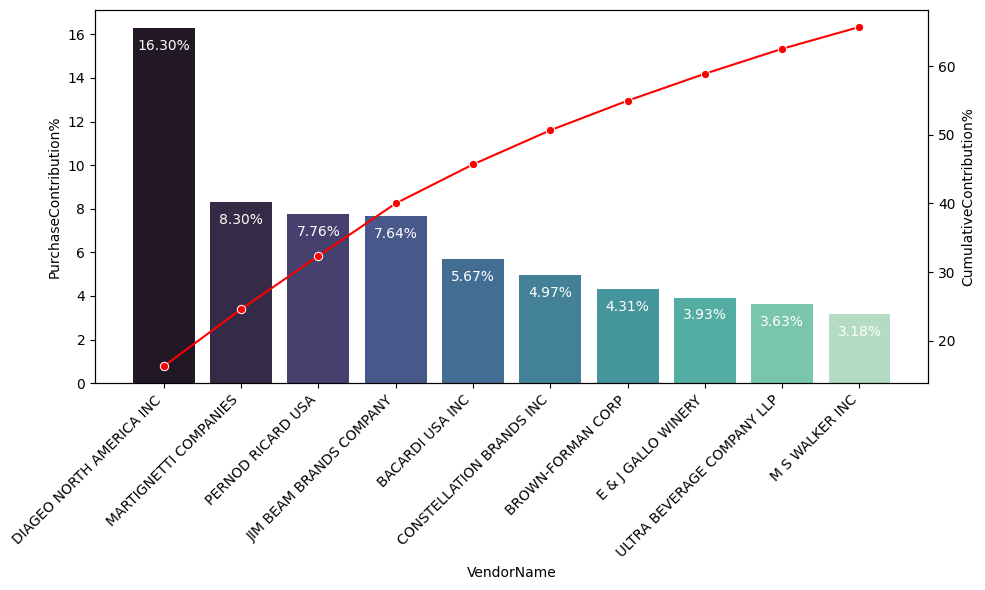

In [56]:
fig,ax1=plt.subplots(figsize=(10,6))
sns.barplot(x='VendorName',y='PurchaseContribution%',data=top_10_vendors,ax=ax1,palette='mako')
for i,value in enumerate(top_10_vendors['PurchaseContribution%']):
  ax1.text(i,value-1,f'{value:.2f}%',ha='center',color='white',fontsize=10)

ax2=ax1.twinx()
sns.lineplot(x='VendorName',y='CumulativeContribution%',data=top_10_vendors,ax=ax2,color='red',marker='o')
ax1.set_xticklabels(top_10_vendors['VendorName'],rotation=45,ha='right')
plt.tight_layout()
plt.show()

In [57]:
print(f"Total Purchase Contribution of top 10 Vendors:{top_10_vendors['PurchaseContribution%'].sum().round(2)}")

Total Purchase Contribution of top 10 Vendors:65.69


In [58]:
df['UnitPurchasePrice']=df['TotalPurchaseDollars']/df['TotalQuantityPurchased']

In [59]:
df['OrderSize']=pd.qcut(df['TotalQuantityPurchased'], q=3, labels=['Small','Medium','Large'])

In [60]:
df.groupby('OrderSize')['UnitPurchasePrice'].mean()

/tmp/ipython-input-2521394752.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('OrderSize')['UnitPurchasePrice'].mean()


,UnitPurchasePrice
OrderSize,
Small,39.057543
Medium,15.486414
Large,10.777625


In [61]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover', ascending=True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


In [62]:
df['UnsoldInventoryValue']=(df['TotalQuantityPurchased']-df['TotalQuantitySold'])*df['PurchasePrice']
print("Total Unsold Capital:",format_value(df['UnsoldInventoryValue'].sum()))

Total Unsold Capital: 2.71M


In [63]:
inventory_value_per_vendor=df.groupby('VendorName')['UnsoldInventoryValue'].sum().reset_index()
inventory_value_per_vendor=inventory_value_per_vendor.sort_values(by='UnsoldInventoryValue',ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue']=inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_value)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
68,PERNOD RICARD USA,470.63K
116,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
79,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
61,MOET HENNESSY USA INC,126.48K
77,REMY COINTREAU USA INC,118.60K
